In [59]:
import pandas as pd 
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.3)
    Q3 = df[column].quantile(0.7)
    IQR = Q3 - Q1  
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered



In [60]:
#TASK 4
emission = pd.read_csv('emissions_by_country.csv')
print(emission.isnull().sum())

numerical_columns = emission.select_dtypes(include=['float64', 'int64']).columns
categorical_columns= emission.select_dtypes(include=['object']).columns

for col in numerical_columns:
    emission[col] = emission.groupby('Country')[col].transform(lambda x: x.fillna(x.mean()))

for col in categorical_columns:
    emission[col] = emission[col].fillna(emission[col].mode()[0])

emission=emission.dropna()
print("$$",emission.isnull().sum())

emission['Country'] = emission['Country'].str.capitalize()
emission['ISO 3166-1 alpha-3'] = emission['ISO 3166-1 alpha-3'].str.upper()

emission['Country']= emission['Country'].astype('category').cat.codes
emission['ISO 3166-1 alpha-3']= emission['ISO 3166-1 alpha-3'].astype('category').cat.codes


Y = emission['Oil'].values
X=emission.drop(columns=['Oil'])

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


import random
N = X.shape[0]
indices = list(range(N))
random.seed(123)
random.shuffle(indices)

train_size = int(0.8 * N)
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train = X.iloc[train_indices]
Y_train = Y[train_indices]
X_test = X.iloc[test_indices]
Y_test = Y[test_indices]

print("Shape of X_train: ",X_train.shape,"Shape of X_test: ",X_test.shape)
print("Shape of Y_train: ",Y_train.shape,"Shape of Y_test: ",Y_test.shape)



Country                  2017
ISO 3166-1 alpha-3       3621
Year                      797
Total                     723
Temperature                 0
GDP Per Capita (USD)        0
Coal                    41307
Oil                     41330
Gas                     41387
Cement                  42616
Flaring                 41766
Other                   60419
Per Capita              43712
dtype: int64
$$ Country                 0
ISO 3166-1 alpha-3      0
Year                    0
Total                   0
Temperature             0
GDP Per Capita (USD)    0
Coal                    0
Oil                     0
Gas                     0
Cement                  0
Flaring                 0
Other                   0
Per Capita              0
dtype: int64
Shape of X_train:  (42402, 12) Shape of X_test:  (10601, 12)
Shape of Y_train:  (42402,) Shape of Y_test:  (10601,)


Iteration 0: Loss = 91006.78951518751
Iteration 100: Loss = 42869.43221518909
Iteration 200: Loss = 42560.0021677685
Iteration 300: Loss = 42510.30169231144
Iteration 400: Loss = 42489.34912639852
Iteration 500: Loss = 42485.995203224295
Iteration 600: Loss = 42491.471458973996
Iteration 700: Loss = 42500.68978664603
Iteration 800: Loss = 42510.90195271425
Iteration 900: Loss = 42520.71301292637
Weights: [-23.10221059  27.05314174  -4.78356594 156.96401839   0.37176165
   0.95697565  71.55223616 114.98854233  32.71916525  35.00660266
  -3.99773177   6.65221068]
Final Loss: 42529.410130859986
Weights of linear regresssion is saved as Pavithran_Assignment1_Part4.pickle


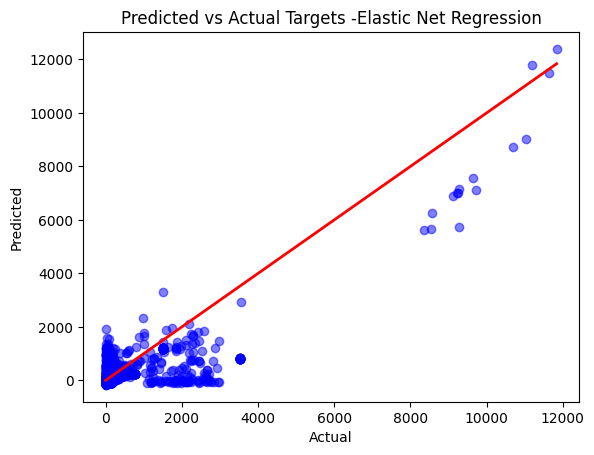

In [62]:
import numpy as np

class ElasticNet:
    def __init__(self, lambda1=1.0, lambda2=1.0, learning_rate=0.01, n_iterations=100):
        self.lambda1 = lambda1 
        self.lambda2 = lambda2 
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w = None 
        self.losses = []


    def fit(self, X, y):
        N, M = X.shape
        self.w = np.zeros(M)
        
        for iteration in range(self.n_iterations):
            predictions = X @ self.w 
            errors = y - predictions 
            

            gradient = - (1 / N) * (X.T.dot(errors)) + self.lambda1 * np.sign(self.w) + self.lambda2 * self.w
            
            self.w -= self.learning_rate * gradient

            loss = (1 / (2 * N)) * np.sum(errors ** 2) + (self.lambda1 * np.sum(np.abs(self.w))) + (self.lambda2 * np.sum(self.w ** 2))
            self.losses.append(loss)
            
            if iteration % 100 == 0:
                print(f"Iteration {iteration}: Loss = {loss}")

    def predict(self, X):
        return X @ self.w  


if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()
if isinstance(Y_train, pd.Series):
    Y_train = Y_train.to_numpy()
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.to_numpy()

# Example usage
model = ElasticNet(lambda1=0.1, lambda2=0.1, learning_rate=0.01, n_iterations=1000)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print("Weights:", model.w)

final_loss = model.losses[-1] if model.losses else None
print("Final Loss:", final_loss)

with open("Pavithran_Assignment1_Part4.pickle", "wb") as file:
    pickle.dump(model.w, file)
print("Weights of linear regresssion is saved as Pavithran_Assignment1_Part4.pickle")


plt.scatter(Y_test, predictions, color="blue", alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color="red", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Targets -Elastic Net Regression")
plt.show()


Using zero initialization:
Iteration 0: Loss = 91006.78951518751
Iteration 100: Loss = 42869.43221518909
Iteration 200: Loss = 42560.0021677685
Iteration 300: Loss = 42510.30169231144
Iteration 400: Loss = 42489.34912639852
Iteration 500: Loss = 42485.995203224295
Iteration 600: Loss = 42491.471458973996
Iteration 700: Loss = 42500.68978664603
Iteration 800: Loss = 42510.90195271425
Iteration 900: Loss = 42520.71301292637
Weights: [-23.10221059  27.05314174  -4.78356594 156.96401839   0.37176165
   0.95697565  71.55223616 114.98854233  32.71916525  35.00660266
  -3.99773177   6.65221068]
final loss:  42529.410130859986


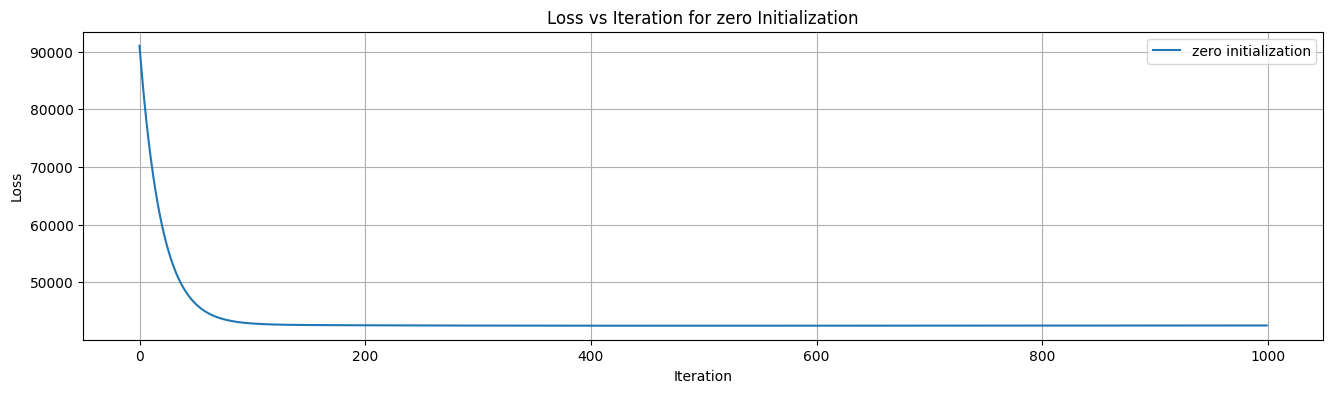


Using random initialization:
Iteration 0: Loss = 90731.89085420655
Iteration 100: Loss = 42867.22583379758
Iteration 200: Loss = 42558.92077037553
Iteration 300: Loss = 42509.87671760203
Iteration 400: Loss = 42489.2352965435
Iteration 500: Loss = 42486.01692544935
Iteration 600: Loss = 42491.54956345823
Iteration 700: Loss = 42500.786338510865
Iteration 800: Loss = 42510.998472887804
Iteration 900: Loss = 42520.80101198438
Weights: [-23.11290314  27.06369211  -4.78372641 156.96994358   0.37173561
   0.95699934  71.54545055 114.98811387  32.71973454  35.00735931
  -3.99857255   6.65248744]
final loss:  42529.48651606003


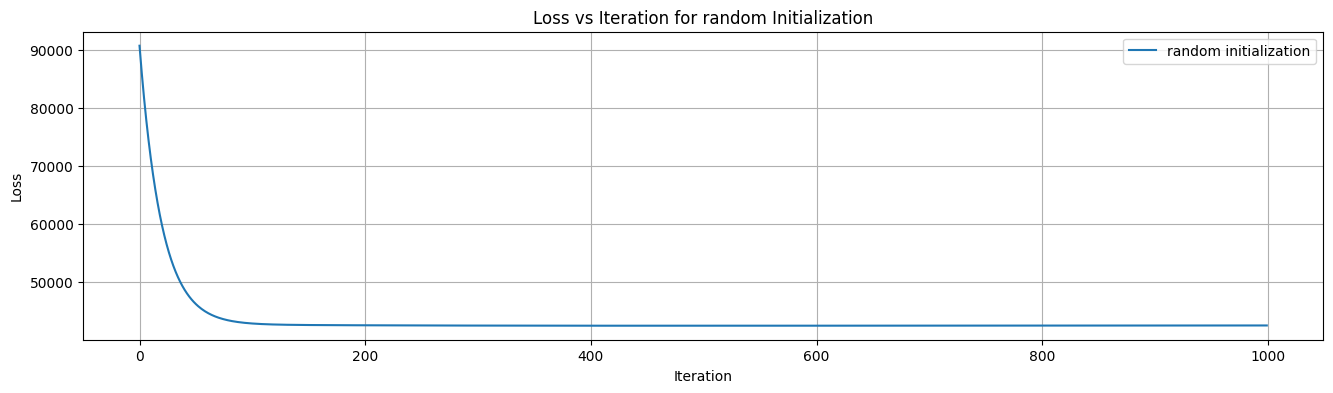


Using xavier initialization:
Iteration 0: Loss = 91215.97610523012
Iteration 100: Loss = 42868.07540350934
Iteration 200: Loss = 42559.869162692055
Iteration 300: Loss = 42510.422289688846
Iteration 400: Loss = 42489.43761680681
Iteration 500: Loss = 42486.03320417903
Iteration 600: Loss = 42491.4760552934
Iteration 700: Loss = 42500.67666754317
Iteration 800: Loss = 42510.88119966528
Iteration 900: Loss = 42520.69032654556
Weights: [-23.10769365  27.05874696  -4.7832742  156.95783667   0.37176689
   0.95693913  71.55766267 114.9891083   32.71823048  35.00593729
  -3.99817414   6.65203638]
final loss:  42529.3884202096


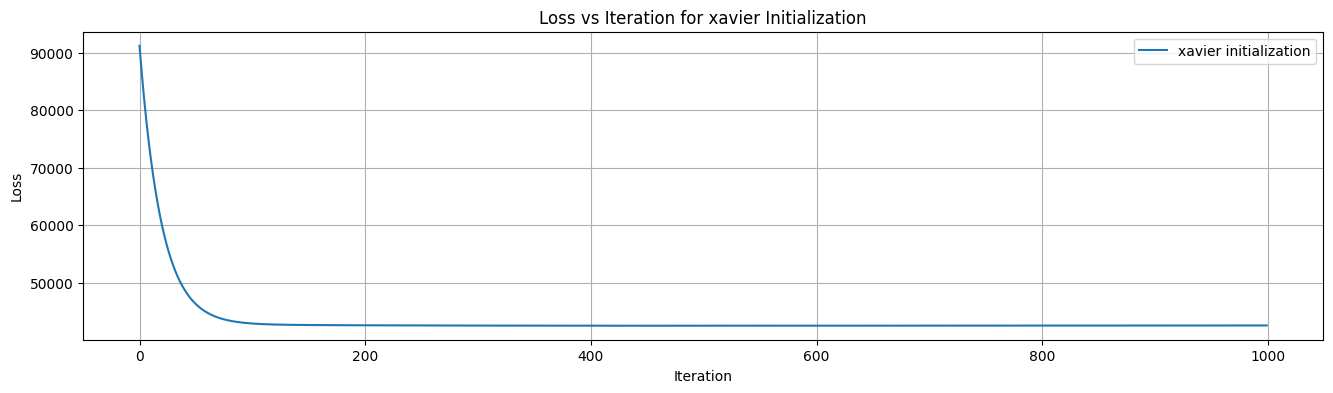

In [63]:
import numpy as np
import pandas as pd

class ElasticNet:
    def __init__(self, lambda1=1.0, lambda2=1.0, learning_rate=0.01, n_iterations=100, initialization='zero'):
        self.lambda1 = lambda1
        self.lambda2 = lambda2  
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.initialization = initialization
        self.losses = []
        self.w = None 

    def initialize_weights(self, input_dim):
        if self.initialization == 'random':
            return np.random.uniform(0, 1, size=input_dim)
        elif self.initialization == 'zero':
            return np.zeros(input_dim)
        elif self.initialization == 'xavier':
            limit = np.sqrt(6 / (input_dim + 1)) 
            return np.random.uniform(-limit, limit, size=input_dim)
        else:
            raise ValueError("Unknown initialization method")

    def fit(self, X, y):
        N, M = X.shape
        self.w = self.initialize_weights(M)

        for iteration in range(self.n_iterations):
            predictions = X @ self.w  
            errors = y - predictions
            
            gradient = - (1 / N) * (X.T.dot(errors)) + self.lambda1 * np.sign(self.w) + self.lambda2 * self.w
            
            self.w -= self.learning_rate * gradient

            loss = (1 / (2 * N)) * np.sum(errors ** 2) + (self.lambda1 * np.sum(np.abs(self.w))) + (self.lambda2 * np.sum(self.w ** 2))
            self.losses.append(loss)
            
            if iteration % 100 == 0:
                print(f"Iteration {iteration}: Loss = {loss}")

    def predict(self, X):
        return X @ self.w 


if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()
if isinstance(Y_train, pd.Series):
    Y_train = Y_train.to_numpy()
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.to_numpy() 

losses_dict = {}

initializations = ['zero', 'random', 'xavier']
for init in initializations:
    print(f"\nUsing {init} initialization:")
    model = ElasticNet(lambda1=0.1, lambda2=0.1, learning_rate=0.01, n_iterations=1000, initialization=init)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)

    # Print the final weights
    print("Weights:", model.w)

    # Store losses for this initialization method
    losses_dict[init] = model.losses
    print("final loss: ",losses_dict[init][-1])

    # Plotting the loss graph for the current initialization
    plt.figure(figsize=(16, 4))
    plt.plot(losses_dict[init], label=f'{init} initialization')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title(f'Loss vs Iteration for {init} Initialization')
    plt.legend()
    plt.grid(True)
    plt.show()
    

Iteration 0: Loss = 91006.78951518751
Iteration 1000: Loss = 42529.49188186058
Iteration 2000: Loss = 42564.84095382464
Stopping early at iteration 2865 due to small gradient.
Using gradient condition −0.01 < gradient < 0.01
Weights: [-24.62651487  28.48866862  -4.93076509 160.91393013   0.35906213
   0.97064654  67.47467085 114.83765666  33.16211691  35.44517667
  -4.13103828   6.78155907]
Final loss:  42568.120724224034


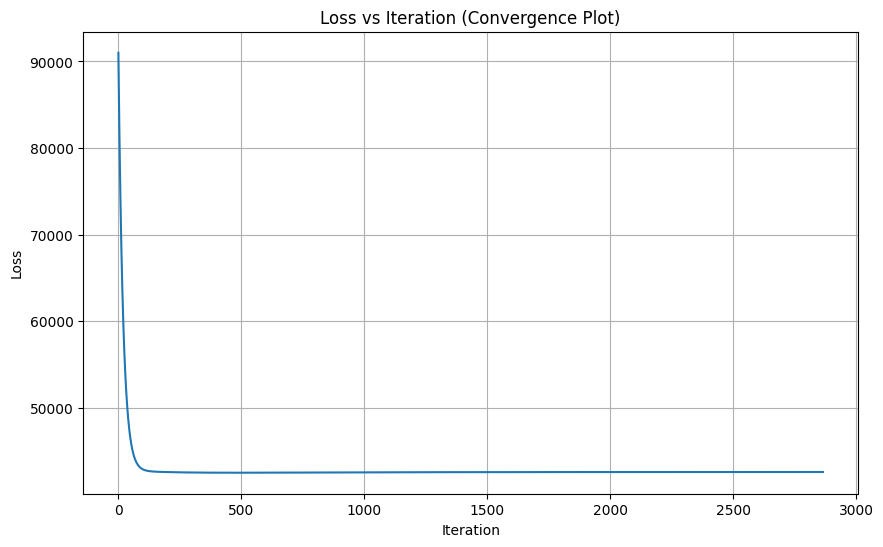

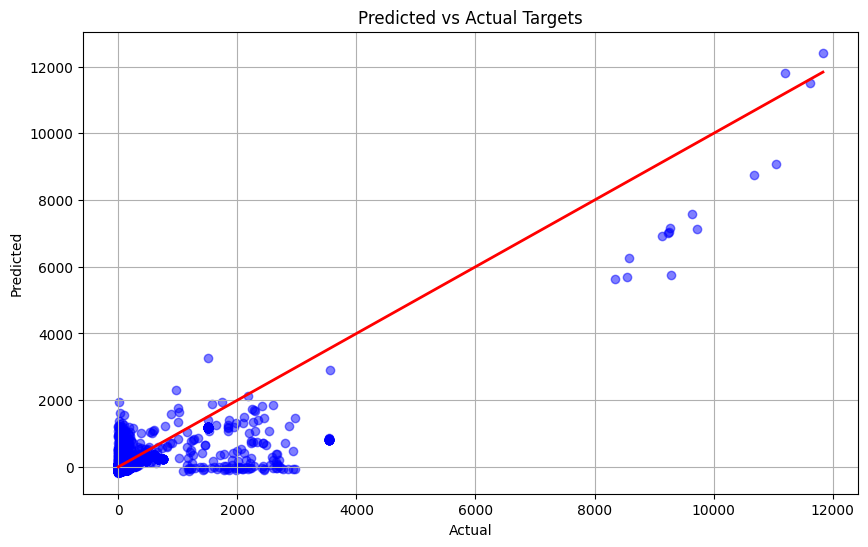

In [64]:
import numpy as np
import matplotlib.pyplot as plt

class ElasticNet:
    def __init__(self, lambda1=1.0, lambda2=1.0, learning_rate=0.01, n_iterations=10000):
        self.lambda1 = lambda1
        self.lambda2 = lambda2
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w = None
        self.losses = []  # To store losses for convergence plot

    def fit(self, X, y):
        N, M = X.shape
        self.w = np.zeros(M)
        
        for iteration in range(self.n_iterations):
            predictions = X @ self.w
            errors = y - predictions
            
            gradient = - (1 / N) * (X.T.dot(errors)) + self.lambda1 * np.sign(self.w) + self.lambda2 * self.w
            
            # Adjust gradient threshold for stopping condition
            if np.all(gradient > -0.01) and np.all(gradient < 0.01):  
                print(f"Stopping early at iteration {iteration} due to small gradient.")
                break
            
            self.w -= self.learning_rate * gradient
            
            # Calculate loss and store it
            loss = (1 / (2 * N)) * np.sum(errors ** 2) + (self.lambda1 * np.sum(np.abs(self.w))) + (self.lambda2 * np.sum(self.w ** 2))
            self.losses.append(loss)
            
            if iteration % 1000 == 0:
                print(f"Iteration {iteration}: Loss = {loss}")

    def predict(self, X):
        return X @ self.w

# Convert to numpy arrays if necessary
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()
if isinstance(Y_train, pd.Series):
    Y_train = Y_train.to_numpy()

model = ElasticNet(lambda1=0.1, lambda2=0.1, learning_rate=0.01, n_iterations=10000)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

print("Using gradient condition −0.01 < gradient < 0.01")
print("Weights:", model.w)
loss1 =[]
loss1= model.losses
print("Final loss: ",loss1[-1])

# --- Plot 1: Convergence Plot (Loss vs Iteration) ---
plt.figure(figsize=(10, 6))
plt.plot(model.losses, label="Loss")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs Iteration (Convergence Plot)')
plt.grid(True)
plt.show()

# --- Plot 2: Predictions vs Actuals ---
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, color="blue", alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color="red", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Targets")
plt.grid(True)
plt.show()
